# **DA-16: Covid Detection using Chest X-Ray Images**
### **Name: Saurabh Rajesh Mishra**
### **Roll No.: 23CS60R51**
### **Computer Science and Engineering, IIT Kharagpur**

## Importing all Necessary Libraries

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from math import ceil
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## 1.  **Extracting the features from the images.**

In the provided code, there are two main functions: `load_and_preprocess_image` and `extract_features`. These functions are designed for loading and preprocessing images and extracting features from a directory containing images, respectively.

Certainly, let's expand on the provided explanation:

1. **load_and_preprocess_image function:**
   - **Input:** `img_path` - the file path of the image to be loaded and preprocessed.
   - **Output:** Returns a flattened array representing the preprocessed image.

   This function is a utility for loading and preprocessing a single image:
   - **Image Loading:** Utilizes OpenCV (`cv2.imread`) to read the image from the specified path.
   - **Resizing:** Resizes the image to a fixed size of 224x224 pixels using OpenCV (`cv2.resize`).
   - **Color Space Conversion:** Converts the image color space from BGR to RGB using OpenCV (`cv2.cvtColor`), as OpenCV loads images in BGR format by default.
   - **Normalization:** Normalizes the pixel values to be between 0 and 1 by dividing each pixel value by 255.0.

2. **extract_features function:**
   - **Input:** `directory` - the path to the directory containing subdirectories for each image category.
   - **Output:** Returns two NumPy arrays: `features` and `labels`.

   This function is designed for creating a dataset for machine learning:
   - **Initialization:** Initializes empty lists `features` and `labels`.
   - **Iteration through Categories:** Iterates through each category in the provided directory (`CATEGORIES`), where each category corresponds to a class (e.g., 'Covid', 'Normal', 'Viral Pneumonia').
   - **Iteration through Images:** Within each category, iterates through the images (`os.listdir(path)`) and constructs the complete path to each image.
   - **Image Processing:** Calls the `load_and_preprocess_image` function to load and preprocess each image.
   - **Data Organization:** Appends the flattened image (feature) to the `features` list and the corresponding class index (label) to the `labels` list.
   - **Class Indexing:** Increments the `class_num` to represent the next class.

   Finally, the function returns NumPy arrays `features` and `labels`, where `features` contains the preprocessed image data, and `labels` contains the corresponding class indices.

**Tools and Feature Extraction Procedure:**
- **Tools:**        
  - 1. **OpenCV (cv2):** - Used for reading, resizing, and color space conversion of images.
       - **What is OpenCV?**
         - OpenCV, or Open Source Computer Vision Library, is an open-source computer vision and machine learning software library. It provides a comprehensive set of tools for image and video processing, including various functions for image loading, manipulation, and computer vision tasks.
       - **Functions Used in the Code:**
         - `cv2.imread`: Loads an image from a specified file path.
         - `cv2.resize`: Resizes the image to a specified size.
         - `cv2.cvtColor`: Converts the color space of an image.
       - **Importance in Image Processing:**
         - OpenCV is widely used in computer vision applications and image processing tasks due to its efficiency and versatility.
         - In this code, OpenCV is crucial for reading and manipulating images, including resizing and color space conversion.
        
    
  - 2. **NumPy:** Used for array manipulation and storage of features and labels.
        Certainly, let's delve deeper into the tools used in the provided code, namely OpenCV (cv2) and NumPy.
       - **What is NumPy?**
         - NumPy is a powerful numerical computing library in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays. NumPy is a fundamental package for scientific computing with Python.
       - **Functions Used in the Code:**
         - `np.array`: Creates a NumPy array from a list.
       - **Importance in Image Processing:**
         - NumPy is used for efficient array operations, making it essential for handling and manipulating the image data.
         - In this code, NumPy is employed to create arrays to store features and labels, facilitating the organization and preparation of the data for machine learning.

  - 3. **Overall Significance:**
    - The combination of OpenCV and NumPy is powerful for image processing tasks in Python.
    - OpenCV handles the intricacies of image loading, resizing, and color space conversion.
    - NumPy provides efficient array operations, enabling the creation and manipulation of numerical data structures.
    - Together, these tools facilitate the preparation of image data for machine learning tasks, making them essential components of the code's feature extraction procedure.

- **Feature Extraction Procedure:**
  - The feature extraction process involves loading and preprocessing images using OpenCV within the `load_and_preprocess_image` function.
  - Features are represented as flattened arrays after preprocessing.
  - The `extract_features` function organizes these features and assigns class labels to create a dataset suitable for training a machine learning model.
  - The extracted features are then used as input for a machine learning model, with each class corresponding to a specific lung condition (e.g., 'Covid', 'Normal', 'Viral Pneumonia').

In [2]:
# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize pixel values to be between 0 and 1
    return img.flatten()

# Function to extract features
def extract_features(directory):
    features = []
    labels = []
    class_num = 0
    CATEGORIES = ['Covid', 'Normal', 'Viral Pneumonia']
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = load_and_preprocess_image(img_path)
            
            features.append(img)
            labels.append(class_num)
        
        class_num += 1
    
    return np.array(features), np.array(labels)

### Extracting **Training** Data Features

In [3]:
# Set data directory and categories
DATADIR = './Covid19-dataset/train'

# Extract features from the training set
X, y = extract_features(DATADIR)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 2. **Spliting** the train dataset into **90-10%** train/validation data.

In [4]:
# Split the dataset into 90% training and 10% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)

# Display the sizes of the datasets after splitting
print("Training and Validation Set sizes after splitting: ")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape[0])
training_set_percentage = (X_train.shape[0] / X.shape[0]) * 100
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape[0])
validation_set_percentage = (X_val.shape[0] / X.shape[0]) * 100
print("\nTraining Set size is: {:.0f}%".format(training_set_percentage))
print("Validation Set size is: {:.0f}%".format(validation_set_percentage))

Training and Validation Set sizes after splitting: 
X_train:  (225, 150528)
y_train:  225
X_val:  (26, 150528)
y_val:  26

Training Set size is: 90%
Validation Set size is: 10%


### Extracting **Testing** Data Features to be used for evaluation

In [5]:
# Load and preprocess test set
X_test, y_test = extract_features('./Covid19-dataset/test')
X_test = scaler.transform(X_test)
print("Training set size: ")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape[0])

Training set size: 
X_test:  (66, 150528)
y_test:  66


### **Data Exploration and visualization**

### The data is Imbalanced with over 110 Covid Images but only 70 for both Pneumonia and Normal images.

### Hence, we'll use class weight balance to train so as to balance the classes!

Count of each class in the original training set:
Class Covid: 111 Images
Class Normal: 70 Images
Class Viral Pneumonia: 70 Images

Count of each class in the original test set:
Class Covid: 26 Images
Class Normal: 20 Images
Class Viral Pneumonia: 20 Images


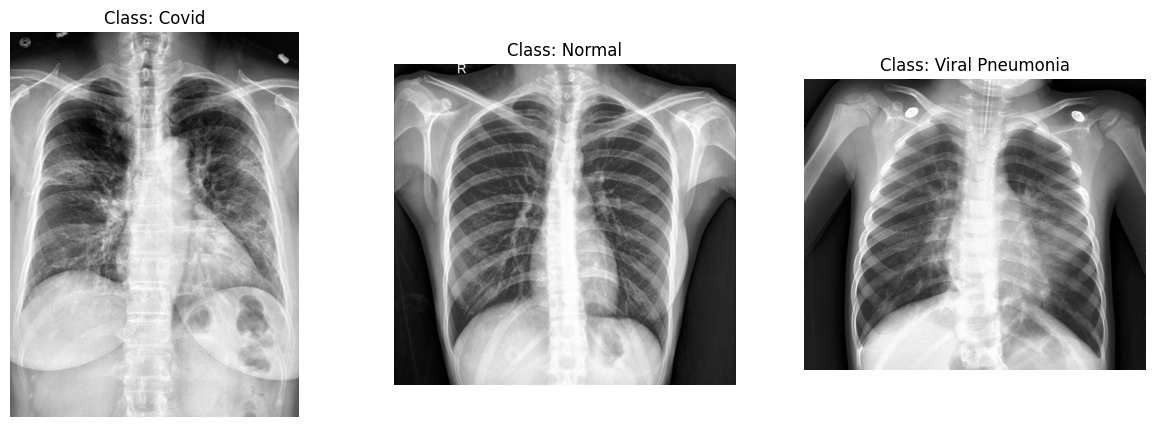

In [6]:
print("Count of each class in the original training set:")
CATEGORIES = ['Covid', 'Normal', 'Viral Pneumonia']

for i in range(len(np.bincount(y))):
    print("Class {}: {} Images".format(CATEGORIES[i], np.bincount(y)[i]))

print("\nCount of each class in the original test set:")

for i in range(len(np.bincount(y_test))):
    print("Class {}: {} Images".format(CATEGORIES[i], np.bincount(y_test)[i]))

DATADIR = './Covid19-dataset/train'

def load_and_display_one_image_per_class(data, labels, categories, img_size):
    unique_classes = np.unique(labels)
    
    fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 5))  # Adjust figsize as needed
    
    for i, class_label in enumerate(unique_classes):
        # Find the first image of the current class
        index = np.where(labels == class_label)[0][0]
        
        # Load the image in higher resolution
        img_path = os.path.join(DATADIR, categories[class_label], os.listdir(os.path.join(DATADIR, categories[class_label]))[0])
        high_res_img = cv2.imread(img_path)
        high_res_img = cv2.cvtColor(high_res_img, cv2.COLOR_BGR2RGB)  # Convert color space to RGB

        # Display the image
        axes[i].imshow(high_res_img)
        axes[i].set_title(f"Class: {categories[class_label]}")
        axes[i].axis('off')  # Turn off axis labels for better visualization
    
    plt.show()

IMG_SIZE = 224
load_and_display_one_image_per_class(X, y, CATEGORIES, IMG_SIZE)


## **Evaluator function** to Report Accuracy, Precision, Recall, F1-Score, AUC-ROC and Confusion Matrix for each model

In [7]:
def evaluate_classifier_validation(clf, X_val, y_val, class_names, clf_name):
    # Fit the classifier
    clf.fit(X_train, y_train)

    # Predictions on validation set
    y_pred_val = clf.predict(X_val)

    # Evaluate metrics on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val, average='weighted')
    recall_val = recall_score(y_val, y_pred_val, average='weighted')
    f1_val = f1_score(y_val, y_pred_val, average='weighted')
    roc_auc_val = roc_auc_score(y_val, clf.predict_proba(X_val), multi_class='ovr')
    confusion_val = confusion_matrix(y_val, y_pred_val)

    # Print the results for the validation set
    print(f"\nMetrics on {clf_name} validation data:\n")
    covid_class_accuracy = accuracy_score(y_val[y_val == 0], y_pred_val[y_val == 0])
    print(f"\033[1mAccuracy for 'Covid' class: {ceil(covid_class_accuracy * 100)}% \033[0;0m")
    print(f"Accuracy: {ceil(accuracy_val * 100)}%")
    print(f"Precision: {ceil(precision_val * 100)}%")
    print(f"Recall: {ceil(recall_val * 100)}%")
    print(f"F1-Score: {ceil(f1_val * 100)}%")
    print(f"AUC-ROC: {ceil(roc_auc_val * 100)}%")
    print("Confusion Matrix:")

    # Display confusion matrix graphically
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_val, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f"Confusion Matrix for {clf_name} Validation Data")
    plt.show()

    # Plot AUC-ROC
    plot_roc_curve(clf, X_val, y_val, class_names, clf_name)

def evaluate_classifier_test(clf, X_test, y_test, class_names, clf_name):
    # Fit the classifier
    clf.fit(X_train, y_train)

    # Predictions on test set
    y_pred_test = clf.predict(X_test)

    # Evaluate metrics on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    roc_auc_test = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
    confusion_test = confusion_matrix(y_test, y_pred_test)

    # Print the results for the test set
    print(f"\nMetrics on {clf_name} test data:\n")
    covid_class_accuracy = accuracy_score(y_test[y_test == 0], y_pred_test[y_test == 0])
    print(f"\033[1mAccuracy for 'Covid' class: {ceil(covid_class_accuracy * 100)}%\033[0;0m")
    print(f"Accuracy: {ceil(accuracy_test * 100)}%")
    print(f"Precision: {ceil(precision_test * 100)}%")
    print(f"Recall: {ceil(recall_test * 100)}%")
    print(f"F1-Score: {ceil(f1_test * 100)}%")
    print(f"AUC-ROC: {ceil(roc_auc_test * 100)}%")
    print("Confusion Matrix:")

    # Display confusion matrix graphically
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f"Confusion Matrix for {clf_name} Test Data")
    plt.show()

    # Plot AUC-ROC
    plot_roc_curve(clf, X_test, y_test, class_names, clf_name)

def plot_roc_curve(clf, X, y, class_names, clf_name):
    from sklearn.metrics import roc_curve, auc
    from sklearn.preprocessing import label_binarize
    n_classes = len(class_names)

    # Binarize the output
    y_bin = label_binarize(y, classes=np.unique(y))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], clf.predict_proba(X)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(6, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {clf_name}')
    plt.legend(loc='lower right')
    plt.show()

CATEGORIES = ['Covid', 'Normal', 'Viral Pneumonia']

# Initialize classifiers
clf_nb = GaussianNB(var_smoothing=0.04977023564332109)
clf_dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, min_samples_split=2, ccp_alpha=0.0)
clf_svm = SVC(C=0.1, gamma='scale', kernel='linear', probability=True, class_weight="balanced")

## **3. Running Bayesian Classifier, Decision Tree Classifier and SVM on the data.**
## **4. Report Accuracy, Precision, Recall, F1-Score, AUC-ROC and Confusion Matrix for each model.**

## 3 A. Runing **Bayesian Classifier** on the data.

Using Bayes' theorem, the conditional probability can be decomposed as:
$ \mathbf{p}(C_{k} \mid \mathbf{x}) = \frac{p(C_{k}) \cdot p(\mathbf{x} \mid C_{k})}{p(\mathbf{x})} $

In plain English, using Bayesian probability terminology, the above equation can be written as:

$ {\text{posterior}}={\frac {{\text{prior}}\times {\text{likelihood}}}{\text{evidence}}} $

This means that under the above independence assumptions, the conditional distribution over the class variable C is:

$$ \mathbf{p}(C_{k} \mid x_{1},\ldots ,x_{n}) \propto p(C_{k},x_{1},\ldots ,x_{n}) $$
$$ = p(C_{k}) \ p(x_{1} \mid C_{k}) \ p(x_{2} \mid C_{k}) \ p(x_{3} \mid C_{k}) \ \cdots $$
$$ = p(C_{k}) \prod _{i=1}^{n} p(x_{i} \mid C_{k}) $$

**Constructing a classifier from the probability model**:

The discussion so far has derived the independent feature model, that is, the naive Bayes probability model. The naive Bayes classifier combines this model with a decision rule. One common rule is to pick the hypothesis that is most probable so as to minimize the probability of misclassification; this is known as the maximum a posteriori or MAP decision rule. The corresponding classifier, a Bayes classifier, is the function that assigns a class label $ {\hat  {y}}=C_{k} $ for some k as follows :

$ {\hat {y}}={\underset {k\in \{1,\ldots ,K\}}{\operatorname {argmax} }}\ p(C_{k})\displaystyle \prod _{i=1}^{n}p(x_{i}\mid C_{k}). $

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution. For example, suppose the training data contains a continuous attribute, x. The data is first segmented by the class, and then the mean and variance of x is computed in each class. Let $ \mu _{k} $ be the mean of the values in x associated with class $ C_{k} $, and let $ \sigma _{k}^{2} $ be the Bessel corrected variance of the values in x associated with class $ C_{k} $. Suppose one has collected some observation value v. Then, the probability density of v given a class $ C_{k} $, i.e., $ p(x=v\mid C_{k}) $, can be computed by plugging v into the equation for a normal distribution parameterized by 
$ \mu _{k} $ and 
$ \sigma _{k}^{2}$. Formally,

$ p(x=v\mid C_{k})={\frac {1}{\sqrt {2\pi \sigma _{k}^{2}}}}\,e^{-{\frac {(v-\mu _{k})^{2}}{2\sigma _{k}^{2}}}} $

### 4 A. Reporting **Accuracy, Precision, Recall, F1-Score, AUC-ROC and Confusion Matrix** for both **Validation** and **Test** Data Set


Metrics on Naive Bayes validation data:

Accuracy for 'Covid' class: 92% 
Accuracy: 93%
Precision: 95%
Recall: 93%
F1-Score: 93%
AUC-ROC: 95%
Confusion Matrix:


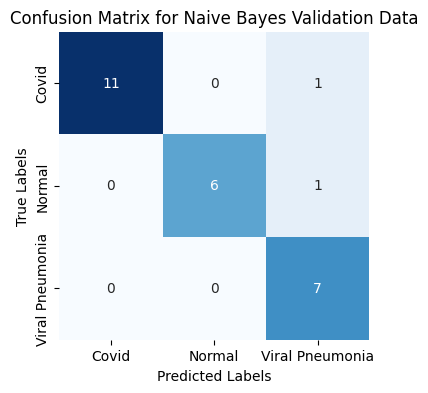

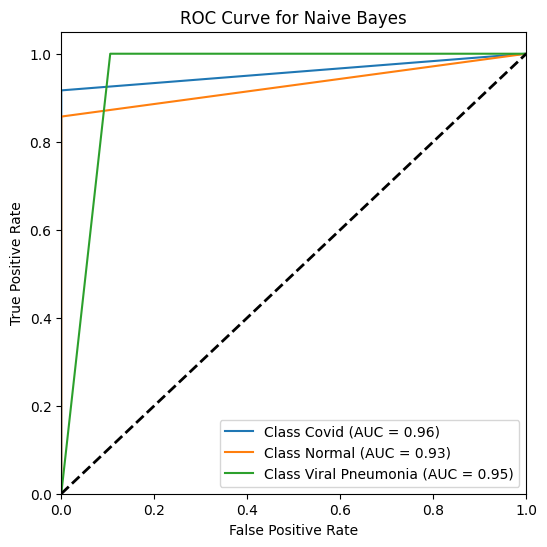

In [8]:
evaluate_classifier_validation(clf_nb, X_val, y_val, CATEGORIES, "Naive Bayes")

### 4 A.  **Evaluating** on **Test Data Set** and Reporting **Accuracy, Precision, Recall, F1-Score, AUC-ROC and Confusion Matrix**


Metrics on Naive Bayes test data:

Accuracy for 'Covid' class: 93%
Accuracy: 79%
Precision: 80%
Recall: 79%
F1-Score: 79%
AUC-ROC: 84%
Confusion Matrix:


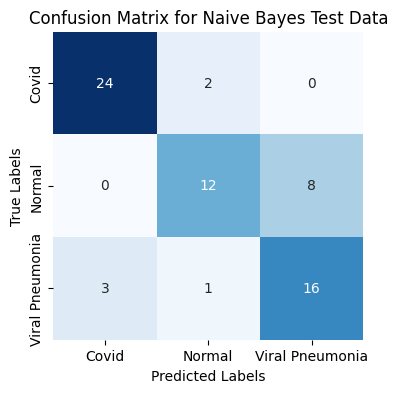

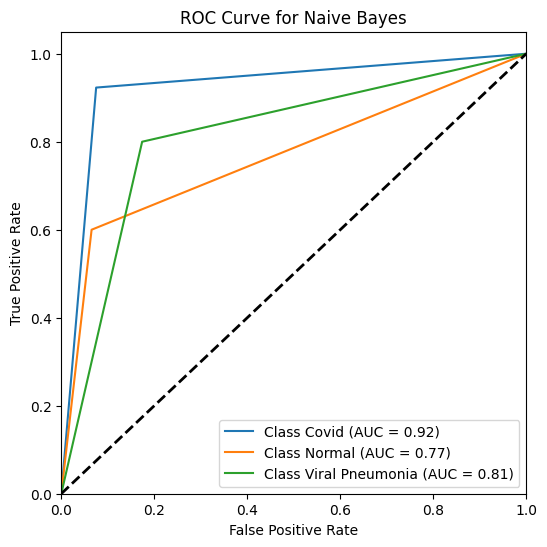

In [9]:
evaluate_classifier_test(clf_nb, X_test, y_test, CATEGORIES, "Naive Bayes")

## 3 B. Runing **Decision Tree Classifier** on the data.

Decision tree learning is a supervised learning approach used in statistics, data mining and machine learning. In this formalism, a classification or regression decision tree is used as a predictive model to draw conclusions about a set of observations.

Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

Notable decision tree algorithms include:

- ID3 (Iterative Dichotomiser 3)
- C4.5 (successor of ID3)
- CART (Classification And Regression Tree)

**Gini Impurity:**

Gini impurity, Gini's diversity index, or Gini-Simpson Index in biodiversity research, is named after Italian mathematician Corrado Gini and used by the CART (classification and regression tree) algorithm for classification trees. Gini impurity measures how often a randomly chosen element of a set would be incorrectly labeled if it were labeled randomly and independently according to the distribution of labels in the set. It reaches its minimum (zero) when all cases in the node fall into a single target category.

For a set of items with J classes and relative frequencies $ p_{i} $, $ i\in \{1,2,...,J\} $ , the probability of choosing an item with label i is $ p_{i} $, and the probability of miscategorizing that item is $ \sum _{k\neq i}p_{k}=1-p_{i} $. The Gini impurity is computed by summing pairwise products of these probabilities for each class label:

$ \operatorname {I} _{G}(p)=\sum _{i=1}^{J}\left(p_{i}\sum _{k\neq i}p_{k}\right)=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-p_{i}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}p_{i}^{2}=1-\sum _{i=1}^{J}p_{i}^{2}.$

The Gini impurity is nothing but a variation of the usual entropy measure for decision trees.

Entropy is measure of uncertainity/Heterogenity or randomness.

### 4 B. Reporting **Accuracy, Precision, Recall, F1-Score, AUC-ROC and Confusion Matrix** for both **Validation** and **Test** Data Set


Metrics on Decision Tree validation data:

Accuracy for 'Covid' class: 84% 
Accuracy: 89%
Precision: 90%
Recall: 89%
F1-Score: 89%
AUC-ROC: 93%
Confusion Matrix:


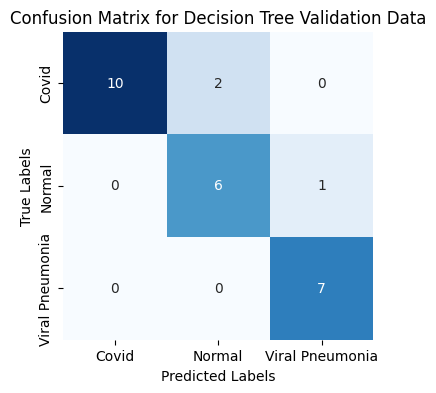

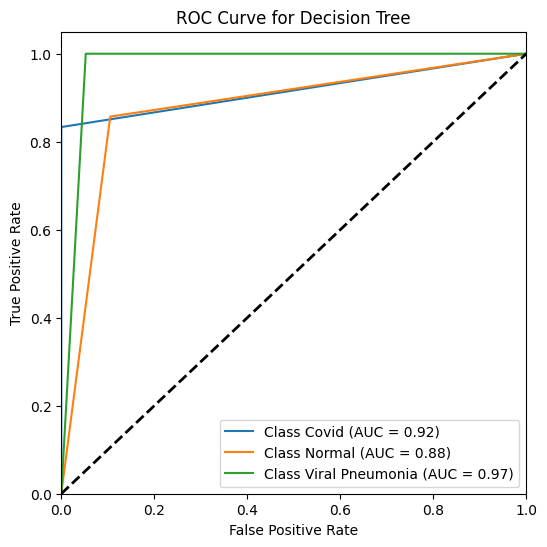

In [10]:
evaluate_classifier_validation(clf_dt, X_val, y_val, CATEGORIES, "Decision Tree")

### 4 B. **Evaluating** on **Test Data Set** and Reporting **Accuracy, Precision, Recall, F1-Score, AUC-ROC and Confusion Matrix**


Metrics on Decision Tree test data:

Accuracy for 'Covid' class: 93%
Accuracy: 73%
Precision: 73%
Recall: 73%
F1-Score: 73%
AUC-ROC: 81%
Confusion Matrix:


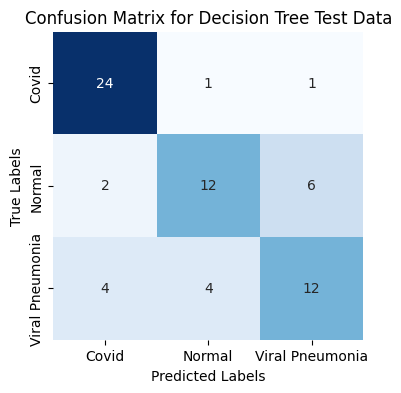

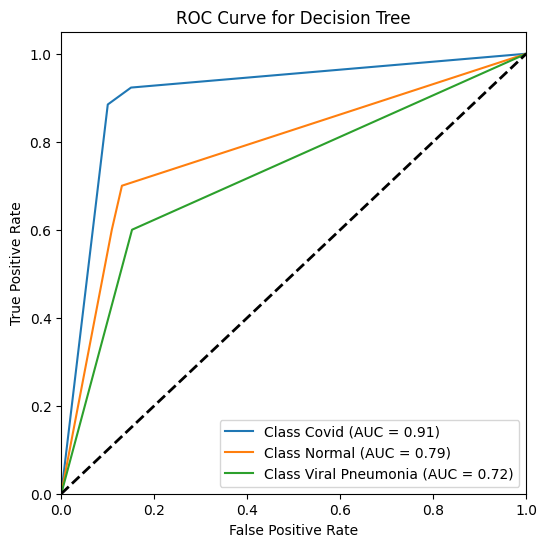

In [11]:
evaluate_classifier_test(clf_dt, X_test, y_test, CATEGORIES, "Decision Tree")

## 3 C. Runing **Support Vector Machine Classifier** on the data.

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

n addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

**Linear SVM:**
We are given a training dataset of n points of the form,

$ (\mathbf {x} _{1},y_{1}),\ldots ,(\mathbf {x} _{n},y_{n}) $

where the $ y_{i} $ are either 1 or −1, each indicating the class to which the point $ \mathbf {x} _{i} $ belongs. Each $ \mathbf {x} _{i} $ is a p-dimensional real vector. We want to find the "maximum-margin hyperplane" that divides the group of points $ \mathbf {x} _{i} $ for which $ y_{i}=1 $ from the group of points for which $ y_{i}=-1 $, which is defined so that the distance between the hyperplane and the nearest point $ \mathbf {x} _{i} $ from either group is maximized.

Any hyperplane can be written as the set of points $ \mathbf {x} $  satisfying 

$ \mathbf {w} ^{\mathsf {T}}\mathbf {x} -b=0 $, 

where $ \mathbf {w} $ is the (not necessarily normalized) normal vector to the hyperplane. This is much like Hesse normal form, except that $ \mathbf {w} $  is not necessarily a unit vector. The parameter 
$ {\tfrac {b}{\|\mathbf {w} \|}} $ determines the offset of the hyperplane from the origin along the normal vector $ \mathbf {w} $.

**Hard-margin**

If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. With a normalized or standardized dataset, these hyperplanes can be described by the equations

$ \mathbf {w} ^{\mathsf {T}}\mathbf {x} -b=1 $ (anything on or above this boundary is of one class, with label 1)
and

$ \mathbf {w} ^{\mathsf {T}}\mathbf {x} -b=-1 $ (anything on or below this boundary is of the other class, with label −1).

Geometrically, the distance between these two hyperplanes is 

$ {\tfrac {2}{\|\mathbf {w} \|}}$ , so to maximize the distance between the planes we want to minimize 
$ \|\mathbf {w} \| $. The distance is computed using the distance from a point to a plane equation. We also have to prevent data points from falling into the margin, we add the following constraint: for each 
i either 

$\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b\geq 1\,,{\text{ if }}y_{i}=1 $,

or

$\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b\leq -1\,,{\text{ if }}y_{i}=-1 $.

These constraints state that each data point must lie on the correct side of the margin.
This can be rewritten as
$y_{i}(\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b)\geq 1,\quad {\text{ for all }}1\leq i\leq n $.
We can put this together to get the optimization problem:
\
\begin{align*}
\min_{\mathbf{w}, b} \quad &\|\mathbf{w}\|_{2}^{2} \\
\text{subject to} \quad &y_{i}(\mathbf{w}^{\top}\mathbf{x}_{i} - b) \geq 1 \quad \forall i \in \{1, \ldots, n\}
\end{align*}
\
The $\mathbf {w}$  and b that solve this problem determine our classifier, 
$\mathbf {x} \mapsto \operatorname {sgn}(\mathbf {w} ^{\mathsf {T}}\mathbf {x} -b) $ where 
$ \operatorname {sgn}(\cdot )$ is the sign function.
An important consequence of this geometric description is that the max-margin hyperplane is completely determined by those 
$\mathbf {x} _{i}$ that lie nearest to it. These 
$\mathbf {x} _{i}$ are called support vectors.

Some common kernels include:

- **Polynomial (homogeneous):**
$ k(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j)^d $
Particularly, when $ d=1 $, this becomes the linear kernel.

- **Polynomial (inhomogeneous):**
$ k(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + r)^d $

- **Gaussian radial basis function:**
$ k(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right) $
for $ \gamma = 1/(2\sigma^2) $.

- **Sigmoid function (Hyperbolic tangent):**
$ k(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\kappa \mathbf{x}_i \cdot \mathbf{x}_j + c) $
for some (not every) $ \kappa > 0 $ and $ c < 0 $.

The kernel is related to the transform $ \varphi(\mathbf{x}_i) $ by the equation:
$ k(\mathbf{x}_i, \mathbf{x}_j) = \varphi(\mathbf{x}_i) \cdot \varphi(\mathbf{x}_j) $

The value $ \mathbf{w} $ is also in the transformed space, with:
$ \mathbf{w} = \sum_i \alpha_i y_i \varphi(\mathbf{x}_i) $

Dot products with $ \mathbf{w} $ for classification can again be computed by the kernel trick, i.e.:
$ \mathbf{w} \cdot \varphi(\mathbf{x}) = \sum_i \alpha_i y_i k(\mathbf{x}_i, \mathbf{x}) $


### 4 C. Reporting **Accuracy, Precision, Recall, F1-Score, AUC-ROC and Confusion Matrix** for both **Validation** and **Test** Data Set


Metrics on SVM validation data:

Accuracy for 'Covid' class: 92% 
Accuracy: 97%
Precision: 97%
Recall: 97%
F1-Score: 97%
AUC-ROC: 100%
Confusion Matrix:


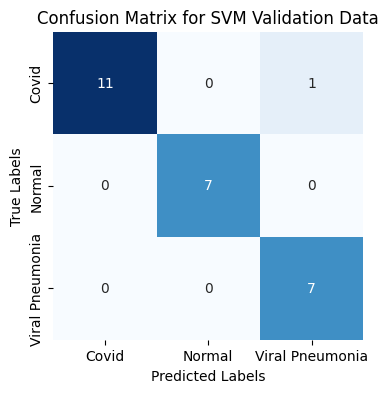

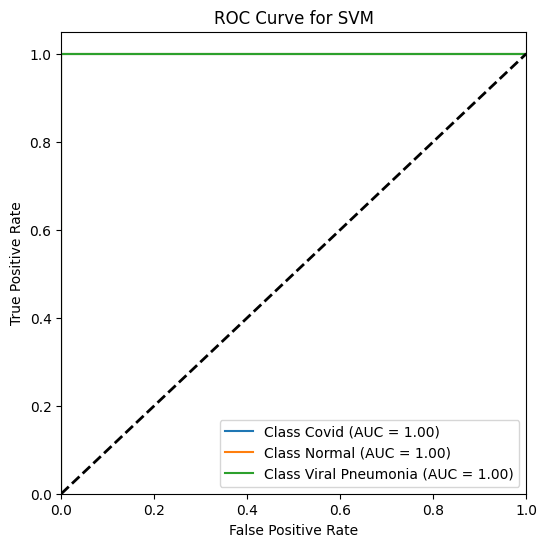

In [12]:
evaluate_classifier_validation(clf_svm, X_val, y_val, CATEGORIES, "SVM")

### 4 C. **Evaluating** on **Test Data Set** and Reporting **Accuracy, Precision, Recall, F1-Score, AUC-ROC and Confusion Matrix**


Metrics on SVM test data:

Accuracy for 'Covid' class: 93%
Accuracy: 93%
Precision: 93%
Recall: 93%
F1-Score: 93%
AUC-ROC: 99%
Confusion Matrix:


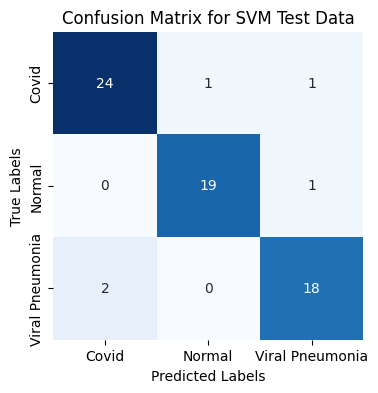

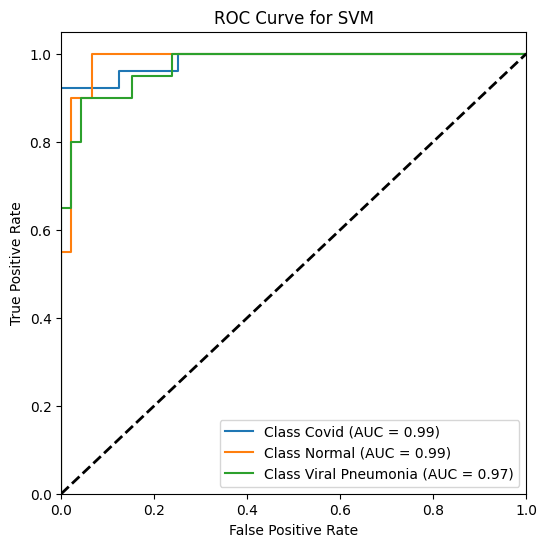

In [13]:
evaluate_classifier_test(clf_svm, X_test, y_test, CATEGORIES, "SVM")

## **Final Conclusion:**
## Thus, The **Best Model** is **SVM** with **93% Accuracy** and **99% AUC** on Test Set!
## And, **97% Accuracy** and **100% AUC** on Validation Set!
## The **Perfect classifier** has **100% AUC** and so **SVM** has **100 % AUC** on **Validation Data** and **99% AUC** on **Test Data**!

Below are some train and error EXTRA cros  validation for hyperparameter tuning (Not required)

## **EXTRA**: K-Fold Cross Validation
Displays average cross validation accuracy and final test accuracy

In [14]:
def evaluate_classifier(clf, X, y, num_folds=10):
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    accuracies = []

    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        clf.fit(X_train_fold, y_train_fold)
        y_pred_fold = clf.predict(X_val_fold)

        accuracy = accuracy_score(y_val_fold, y_pred_fold)
        accuracies.append(accuracy)

        # For demonstration purposes, you can print other metrics if needed
        print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

    # Plot accuracy foldwise
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_folds + 1), accuracies, marker='o', linestyle='-', color='b')
    plt.title('Accuracy Foldwise')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.show()

    # Evaluate on the test set
    y_test_pred = clf.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    average_metrics = {
        'Average Accuracy': np.mean(accuracies),
        'Test Accuracy': accuracy_test
    }

    return average_metrics


K-Fold for SVM: 
Fold 1: Accuracy = 0.9615
Fold 2: Accuracy = 0.9600
Fold 3: Accuracy = 0.9600
Fold 4: Accuracy = 0.9200
Fold 5: Accuracy = 0.9200
Fold 6: Accuracy = 0.9600
Fold 7: Accuracy = 1.0000
Fold 8: Accuracy = 0.9600
Fold 9: Accuracy = 0.9600
Fold 10: Accuracy = 1.0000


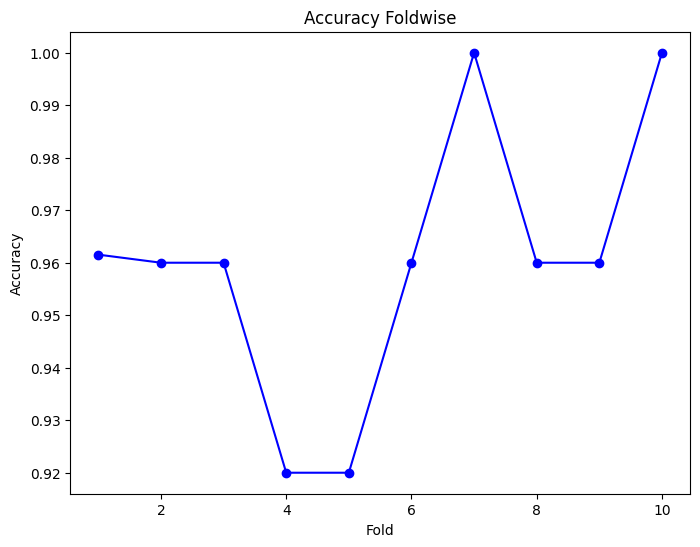

Average Accuracy for SVM:  0.960153846153846
Test Accuracy for SVM:  0.9242424242424242


In [15]:
print("K-Fold for SVM: ")
svm_classifier = SVC(C=0.1, gamma='scale', kernel='linear', probability=True, class_weight="balanced")
average_metrics_svm = evaluate_classifier(svm_classifier, X, y)
print("Average Accuracy for SVM: ", average_metrics_svm["Average Accuracy"])
print("Test Accuracy for SVM: ", average_metrics_svm["Test Accuracy"])

K-Fold for Decision Tree: 
Fold 1: Accuracy = 0.8462
Fold 2: Accuracy = 0.9600
Fold 3: Accuracy = 0.9200
Fold 4: Accuracy = 0.9200
Fold 5: Accuracy = 0.8000
Fold 6: Accuracy = 0.8400
Fold 7: Accuracy = 0.8400
Fold 8: Accuracy = 0.8400
Fold 9: Accuracy = 0.8400
Fold 10: Accuracy = 0.8000


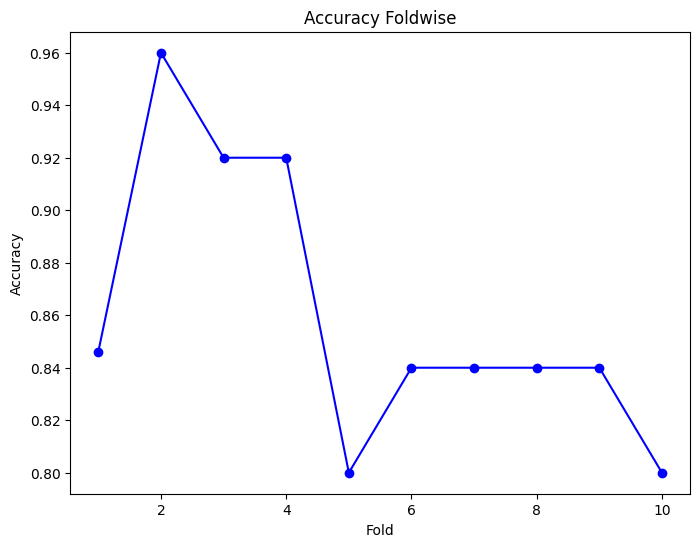

Average Accuracy for Decision Tree:  0.8606153846153847
Test Accuracy for Decision Tree:  0.6818181818181818


In [16]:
print("K-Fold for Decision Tree: ")
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.0)
average_metrics_dt = evaluate_classifier(dt_classifier, X, y)
print("Average Accuracy for Decision Tree: ", average_metrics_dt["Average Accuracy"])
print("Test Accuracy for Decision Tree: ", average_metrics_dt["Test Accuracy"])

K-Fold for Naive Bayes: 
Fold 1: Accuracy = 0.9231
Fold 2: Accuracy = 0.8800
Fold 3: Accuracy = 0.9600
Fold 4: Accuracy = 0.9200
Fold 5: Accuracy = 0.8000
Fold 6: Accuracy = 0.8800
Fold 7: Accuracy = 0.9200
Fold 8: Accuracy = 0.9200
Fold 9: Accuracy = 0.8800
Fold 10: Accuracy = 0.9200


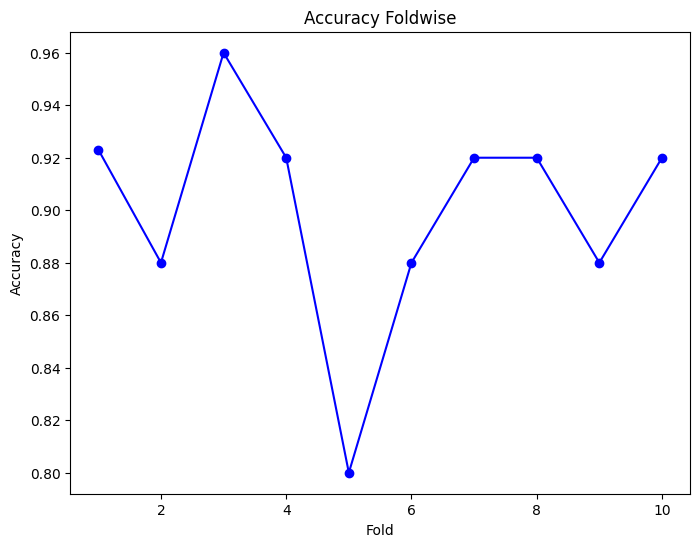

Average Accuracy for Naive bayes:  0.9003076923076924
Test Accuracy for Naive bayes:  0.7878787878787878


In [17]:
print("K-Fold for Naive Bayes: ")
nb_classifier = GaussianNB(var_smoothing=0.04977023564332109)
average_metrics_nb = evaluate_classifier(nb_classifier, X, y)
print("Average Accuracy for Naive bayes: ", average_metrics_nb["Average Accuracy"])
print("Test Accuracy for Naive bayes: ", average_metrics_nb["Test Accuracy"])